**Convergence analysis of number of modes for a shear test**

In [1]:
import sys
sys.path.append("../..")

import matplotlib.pyplot as plt
import numpy as np
import akantu as aka

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

WHERE=0

In [6]:
from wobble.pure import PureMA

max_steps = 5000
time_step = 1e-6

disps=[]
mode_list=[1,4,10,100,1626]
for m in range(len(mode_list)):
    num_modes=mode_list[m]
    ma=PureMA('test', 3, 
                     mesh_file='../sample_data_files/mesh_files/beam.msh',
                     material_file='../sample_data_files/material_files/steel.dat',
                     num_modes=num_modes,
                     force_path='../sample_data_files/force_files/pure_shear_500.txt')
    ma.initialize_model()
    overload_bc_dicts=[{'type': 'FixedValue', 'value': 0.0, 'axis': 'x', 'group': 'right'},
                        {'type': 'FixedValue', 'value': 0.0, 'axis': 'y', 'group': 'right'},
                        {'type': 'FixedValue', 'value': 0.0, 'axis': 'z', 'group': 'right'}]
    ma.assemble_stiffness(overload_bc_dicts=overload_bc_dicts)
    ma.assemble_mass()
    ma.find_eigenmodes(eigenmode_path='../sample_data_files/eigenmode_files/clamped_modes.csv')
    ma.project_initial_displacement()
    ma.project_initial_velocity()
    ma.project_force()
    ma.solve_step_loading()
    plot_array = np.linspace(0,max_steps*time_step, max_steps)
    ma.get_r_and_r_dot(plot_array)
    ma.get_displacement_vectors()
    disps.append(ma.displacement_vectors.copy())

In [7]:
ma.eigenvalues

array([3.92240422e+04, 3.92367042e+04, 1.08489483e+06, ...,
       2.32507983e+10, 2.32834494e+10, 2.35250118e+10])

No handles with labels found to put in legend.
No handles with labels found to put in legend.


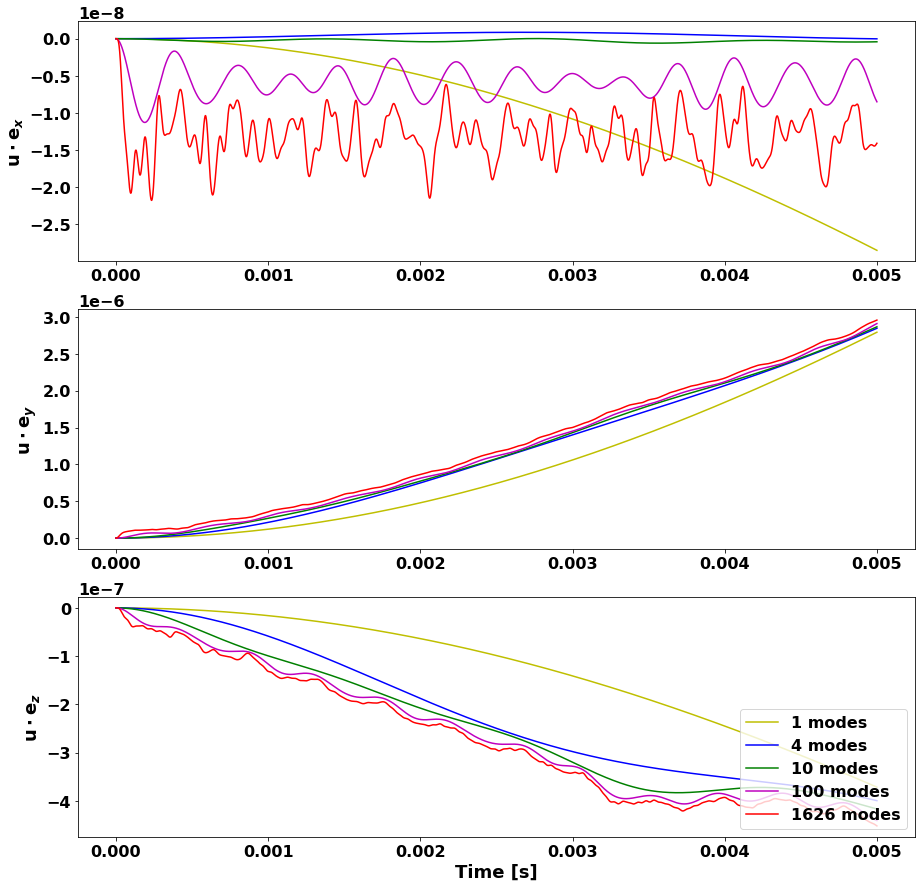

In [9]:
fig,ax=plt.subplots(3, figsize=(15,15))

axes=['\mathbf{e}_x', '\mathbf{e}_y', '\mathbf{e}_z']

cols=['y-', 'b-', 'g-', 'm-', 'r-', 'c-', 'k-']

for j in range(len(mode_list)):
    for i in [0,1,2]:
        ax[i].plot(ma.time_array, disps[j][WHERE*3+i], cols[j], label="{} modes".format(mode_list[j]))
        ax[2].legend(loc='lower right')
        ax[i].set_ylabel('$\mathbf{u} \cdot'+'{}$'.format(axes[i]))
    ax[2].set_xlabel('Time [s]')
#plt.savefig('num_modes_examination_short.png', bbox_inches='tight')
plt.show()